In [236]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [237]:
X = 6 * np.random.rand(1000, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(1000, 1)

In [238]:
def polynomial_regression(X,y,degree):
    X_new = np.linspace(-3,3,100).reshape(100,1)
    
    polynomial_regression = Pipeline([
        ('poly_features',PolynomialFeatures(degree=degree,include_bias=False)),
        ('std_scaller',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])
    polynomial_regression.fit(X,y)
    
    y_pred = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_pred,'r')
    plt.plot(X,y,"g.")

    plt.show()

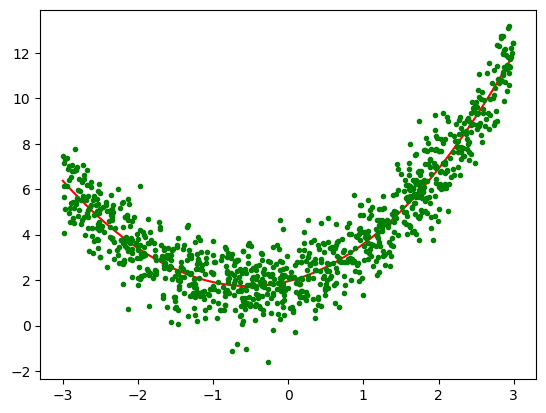

In [239]:
polynomial_regression(X,y,degree=3)

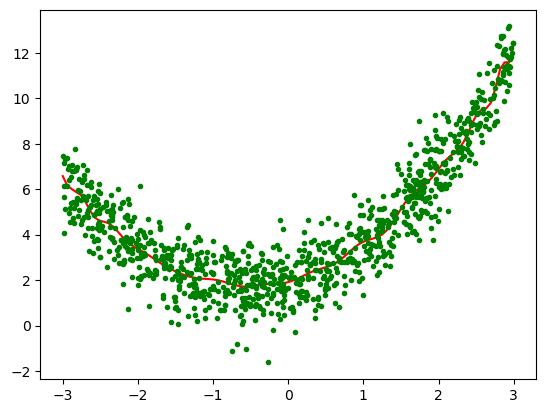

In [240]:
polynomial_regression(X,y,degree=30)

In [241]:
class PolynomialRegression:
    def __init__(self):
        self.polynomial_regression = None

    def fit(self, X_train, y_train, degree):
        polynomial_regression = Pipeline([
            ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),
            ('std_scaler', StandardScaler()),
            ('lin_reg', LinearRegression())
        ])
        polynomial_regression.fit(X_train, y_train)

        self.polynomial_regression = polynomial_regression

    def predict(self, X_test):
        return self.polynomial_regression.predict(X_test)

In [242]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

In [243]:
df = pd.DataFrame(np.hstack([X, y]), columns=['X', 'y'])

X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.2, random_state=2)

X_train_2D = X_train.values.reshape(-1, 1)
X_test_2D = X_test.values.reshape(-1, 1)

In [244]:
p = PolynomialRegression()
p.fit(X_train_2D, y_train, degree=3)

In [245]:
y_pred = p.predict(X_test_2D)

In [246]:
score = r2_score(y_test, y_pred)
print(f"R^2 Score: {score:.3f}")

R^2 Score: 0.845


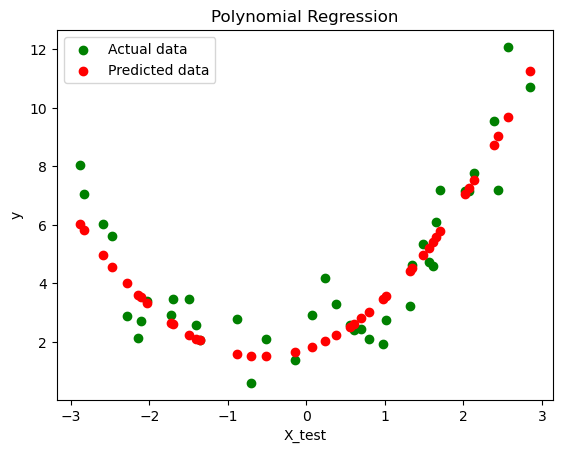

In [247]:
plt.scatter(X_test, y_test, color='g', label='Actual data')
plt.scatter(X_test, y_pred, color='r', label='Predicted data')
plt.xlabel("X_test")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression")
plt.show()
